In [2]:
import numpy as np
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
features = list()
with open('/content/drive/MyDrive/UCI HAR Dataset/features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]
print('No of Features: {}'.format(len(features)))

No of Features: 561


In [5]:
# get the data from txt files to pandas dataffame
X_train = pd.read_csv('/content/drive/MyDrive/UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None)
X_train.columns = [features]
# add subject column to the dataframe
# Read the data without 'squeeze'
subject_data = pd.read_csv('/content/drive/MyDrive/UCI HAR Dataset/train/subject_train.txt', header=None)
# Apply squeeze after reading if needed to convert to Series
X_train['subject'] = subject_data.squeeze("columns") # Squeeze after reading the data

y_train = pd.read_csv('/content/drive/MyDrive/UCI HAR Dataset/train/y_train.txt', names=['Activity'])
# Apply squeeze after reading if needed to convert to Series
y_train = y_train.squeeze("columns") # Squeeze after reading the data
y_train_labels = y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})

# put all columns in a single dataframe
train = X_train
train['Activity'] = y_train
train['ActivityName'] = y_train_labels
train.sample(2)

<ipython-input-5-e8cd0abc73c0>:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv('/content/drive/MyDrive/UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None)


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
4530,0.226022,-0.022994,-0.064793,0.143290,0.320146,-0.069543,0.147774,0.324122,-0.094944,0.207570,...,0.355533,-0.781268,-0.911118,-0.590709,-0.693165,0.309937,0.027002,22,2,WALKING_UPSTAIRS
4404,0.289121,-0.016585,-0.104782,-0.986354,-0.960633,-0.956655,-0.989044,-0.969557,-0.956460,-0.910253,...,-0.807485,-0.026861,-0.029935,0.153474,-0.366252,-0.190852,-0.306743,22,4,SITTING


In [6]:
train.shape

(7352, 564)

In [7]:
# get the data from txt files to pandas dataffame
X_test = pd.read_csv('/content/drive/MyDrive/UCI HAR Dataset/test/X_test.txt', sep='\s+', header=None) # Use sep='\s+'
X_test.columns = features  # Assign features as individual column names

# add subject column to the dataframe
# Read the data without 'squeeze'
subject_data = pd.read_csv('/content/drive/MyDrive/UCI HAR Dataset/test/subject_test.txt', header=None)
# Apply squeeze after reading if needed to convert to Series
X_test['subject'] = subject_data.squeeze("columns") # Squeeze after reading the data

# get y labels from the txt file
# Read the data without 'squeeze'
y_test_data = pd.read_csv('/content/drive/MyDrive/UCI HAR Dataset/test/y_test.txt', names=['Activity'], header=None)
# Apply squeeze after reading if needed to convert to Series
y_test = y_test_data.squeeze("columns") # Squeeze after reading the data

y_test_labels = y_test.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})


# put all columns in a single dataframe
test = X_test
test['Activity'] = y_test
test['ActivityName'] = y_test_labels
test.sample(2)  # Display 2 random samples from the DataFrame

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
2690,0.185943,-0.021964,-0.080478,-0.423855,-0.143319,-0.318308,-0.419895,-0.197803,-0.309664,-0.470689,...,0.776325,-0.652204,0.343969,0.115894,-0.847635,0.146381,0.116190,24,1,WALKING
124,0.278737,-0.048279,-0.120925,0.068434,0.232866,0.094043,-0.035040,0.238581,0.089498,0.743828,...,-0.232545,0.573331,-0.917907,-0.550621,-0.582646,0.303543,0.222511,2,3,WALKING_DOWNSTAIRS


In [8]:
test.shape

(2947, 564)

In [9]:
print('No of duplicates in train: {}'.format(sum(train.duplicated())))
print('No of duplicates in test : {}'.format(sum(test.duplicated())))

<ipython-input-9-f14fa4cde102>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  print('No of duplicates in train: {}'.format(sum(train.duplicated())))


No of duplicates in train: 0
No of duplicates in test : 0


In [10]:
print('We have {} NaN/Null values in train'.format(train.isnull().values.sum()))
print('We have {} NaN/Null values in test'.format(test.isnull().values.sum()))

We have 0 NaN/Null values in train
We have 0 NaN/Null values in test


In [11]:
train.to_csv('/content/drive/MyDrive/UCI HAR Dataset/train.csv', index=False)
test.to_csv('/content/drive/MyDrive/UCI HAR Dataset/test.csv', index=False)

In [12]:
train = pd.read_csv('/content/drive/MyDrive/UCI HAR Dataset/train.csv')
test = pd.read_csv('/content/drive/MyDrive/UCI HAR Dataset/test.csv')
print(train.shape, test.shape)

(7352, 564) (2947, 564)


In [13]:
columns = train.columns

# Removing '()' from column names
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]','')

train.columns = columns
test.columns = columns

test.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity',
       'ActivityName'],
      dtype='object', length=564)

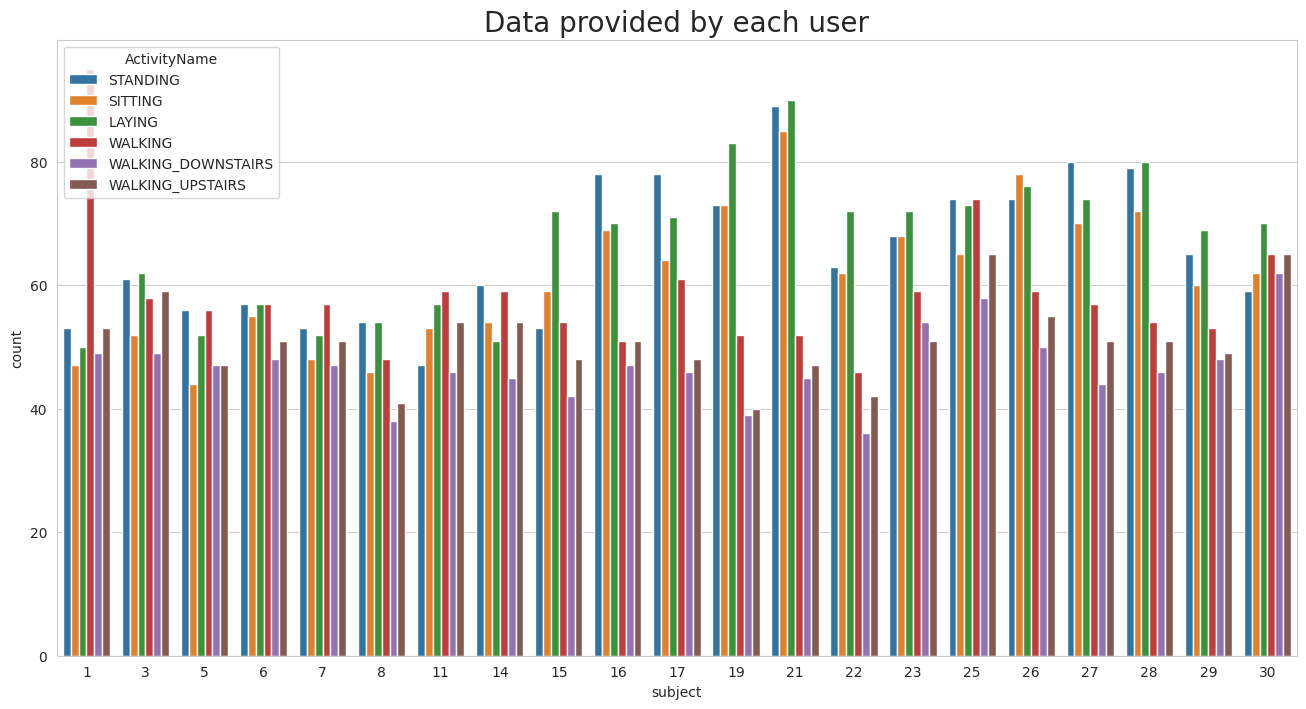

In [14]:
import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject',hue='ActivityName', data = train)
plt.show()

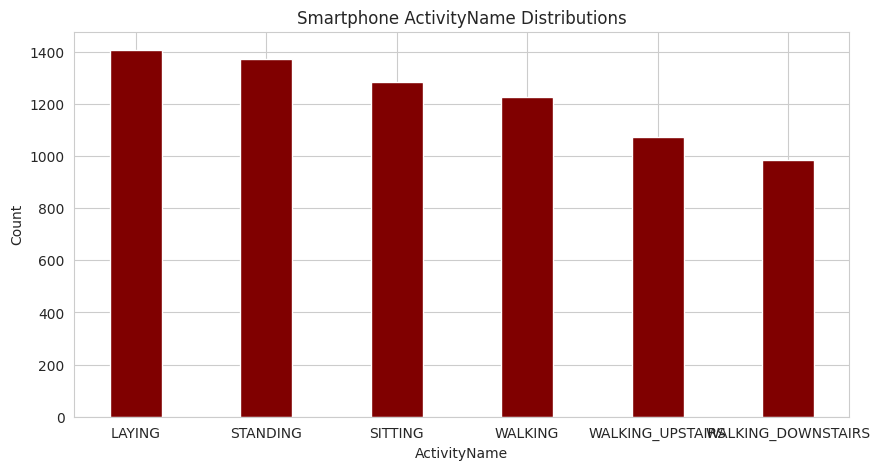

In [15]:
import matplotlib.pyplot as plt

# Plotting data
label_counts = train['ActivityName'].value_counts()

# Get colors
n = label_counts.shape[0]
colormap = plt.get_cmap('viridis')
colors = [mlt.colors.to_hex(colormap(col)) for col in np.arange(0, 1.01, 1/(n-1))]

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(label_counts.index, label_counts, color ='maroon',
        width = 0.4)

plt.xlabel("ActivityName")
plt.ylabel("Count")
plt.title("Smartphone ActivityName Distributions")
plt.show()

In [16]:
print(train.columns)

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity',
       'ActivityName'],
      dtype='object', length=564)


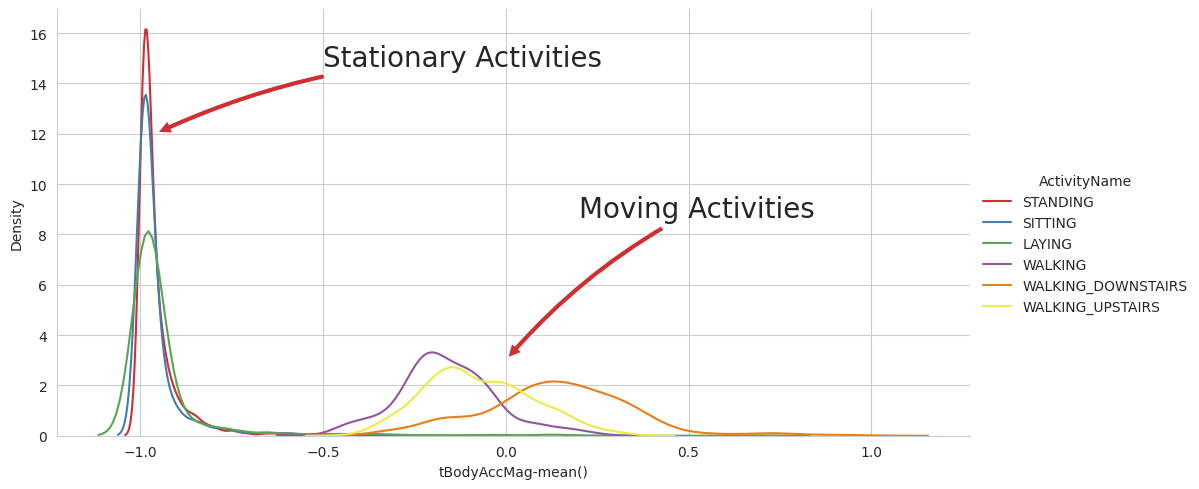

In [20]:
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(train, hue='ActivityName', height=5, aspect=2)
facetgrid.map(sns.kdeplot, 'tBodyAccMag-mean()', fill=False).add_legend()

plt.annotate("Stationary Activities", xy=(-0.960, 12), xytext=(-0.5, 15), size=20,
             va='center', ha='left',
             arrowprops=dict(arrowstyle="simple", connectionstyle="arc3,rad=0.1"))

plt.annotate("Moving Activities", xy=(0, 3), xytext=(0.2, 9), size=20,
             va='center', ha='left',
             arrowprops=dict(arrowstyle="simple", connectionstyle="arc3,rad=0.1"))

plt.show()

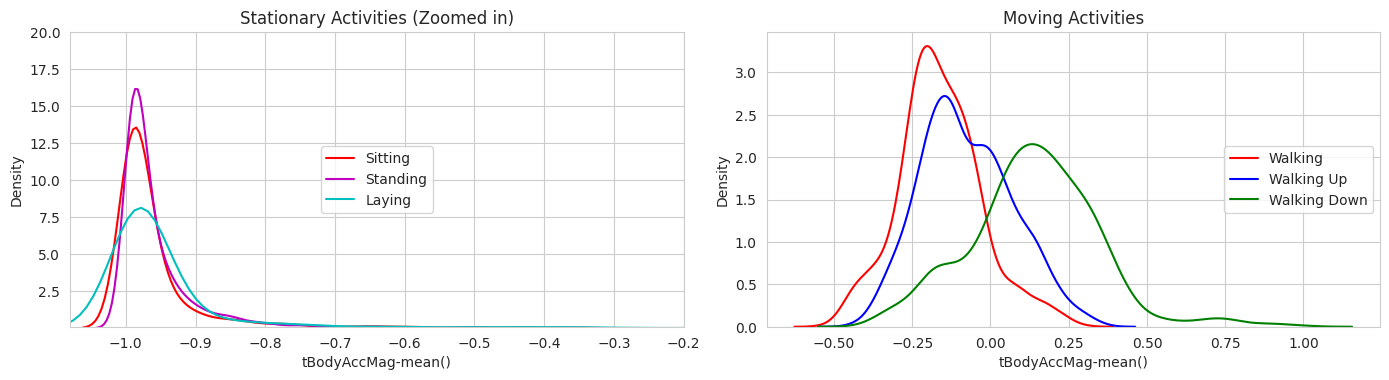

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Separate the data based on activities
df1 = train[train['Activity'] == 1]
df2 = train[train['Activity'] == 2]
df3 = train[train['Activity'] == 3]
df4 = train[train['Activity'] == 4]
df5 = train[train['Activity'] == 5]
df6 = train[train['Activity'] == 6]

plt.figure(figsize=(14, 7))

# Plot for stationary activities
plt.subplot(2, 2, 1)
plt.title('Stationary Activities (Zoomed in)')
sns.kdeplot(df4['tBodyAccMag-mean()'], color='r', label='Sitting', fill=False)
sns.kdeplot(df5['tBodyAccMag-mean()'], color='m', label='Standing', fill=False)
sns.kdeplot(df6['tBodyAccMag-mean()'], color='c', label='Laying', fill=False)
plt.axis([-1.08, -0.2, 0.1, 20])
plt.legend(loc='center')

# Plot for moving activities
plt.subplot(2, 2, 2)
plt.title('Moving Activities')
sns.kdeplot(df1['tBodyAccMag-mean()'], color='red', label='Walking', fill=False)
sns.kdeplot(df2['tBodyAccMag-mean()'], color='blue', label='Walking Up', fill=False)
sns.kdeplot(df3['tBodyAccMag-mean()'], color='green', label='Walking Down', fill=False)
plt.legend(loc='center right')

plt.tight_layout()
plt.show()


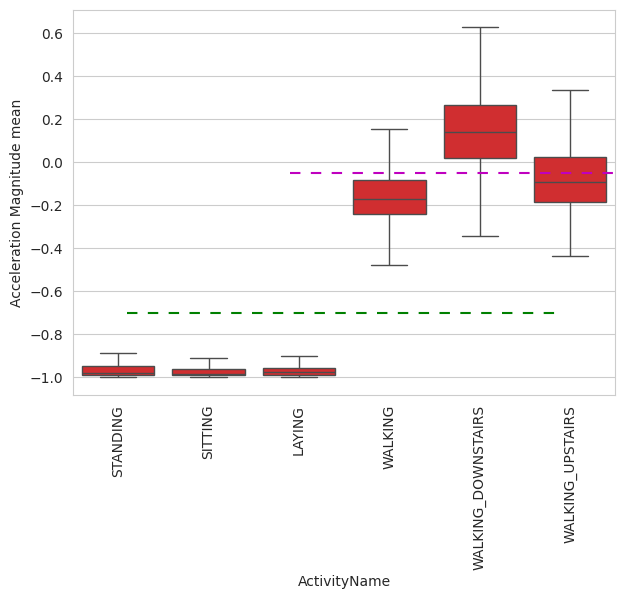

In [22]:
plt.figure(figsize=(7,5))
sns.boxplot(x='ActivityName', y='tBodyAccMag-mean()',data=train, showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=90)
plt.show()

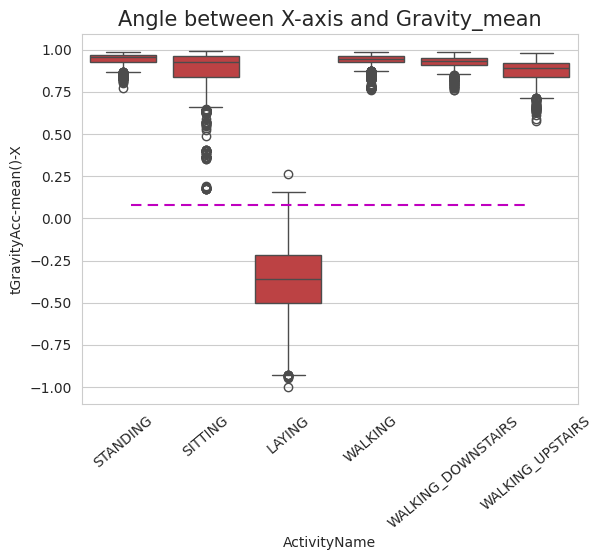

In [23]:
sns.boxplot(x='ActivityName', y='tGravityAcc-mean()-X', data=train)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,c='m',dashes=(5,3))
plt.title('Angle between X-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.show()

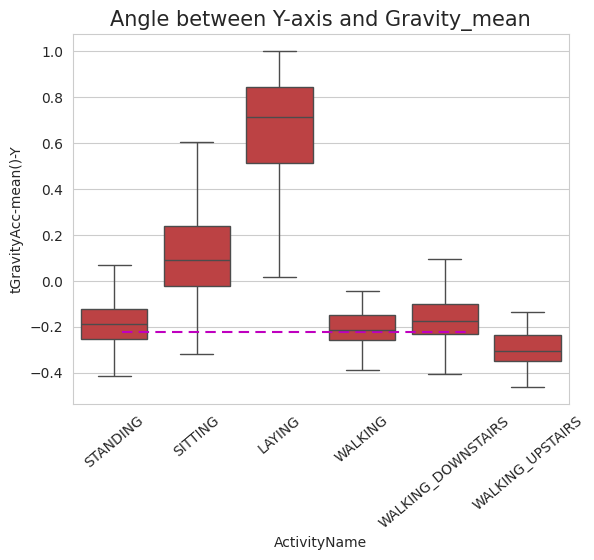

In [24]:
sns.boxplot(x='ActivityName', y='tGravityAcc-mean()-Y', data = train, showfliers=False)
plt.title('Angle between Y-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=-0.22, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()

In [25]:
from sklearn.manifold import TSNE
import seaborn as sns

In [26]:
# performs t-sne with different perplexity values and their repective plots..

def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):

    for index,perplexity in enumerate(perplexities):
        # perform t-sne
        print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
        print('Done..')

        # prepare the data for seaborn
        print('Creating plot for this t-sne visualization..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})

        # draw the plot in appropriate place in the grid
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, height=8,\
                   palette="Set1",markers=['^','v','s','o', '1','2'])
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')


performing tsne with perplexity 2 and with 1000 iterations at max
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.020s...
[t-SNE] Computed neighbors for 7352 samples in 2.634s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.597443
[t-SNE] Computed conditional probabilities in 0.029s
[t-SNE] Iteration 50: error = 119.3289566, gradient norm = 0.0442620 (50 iterations in 5.377s)
[t-SNE] Iteration 100: error = 105.1834793, gradient norm = 0.0257400 (50 iterations in 

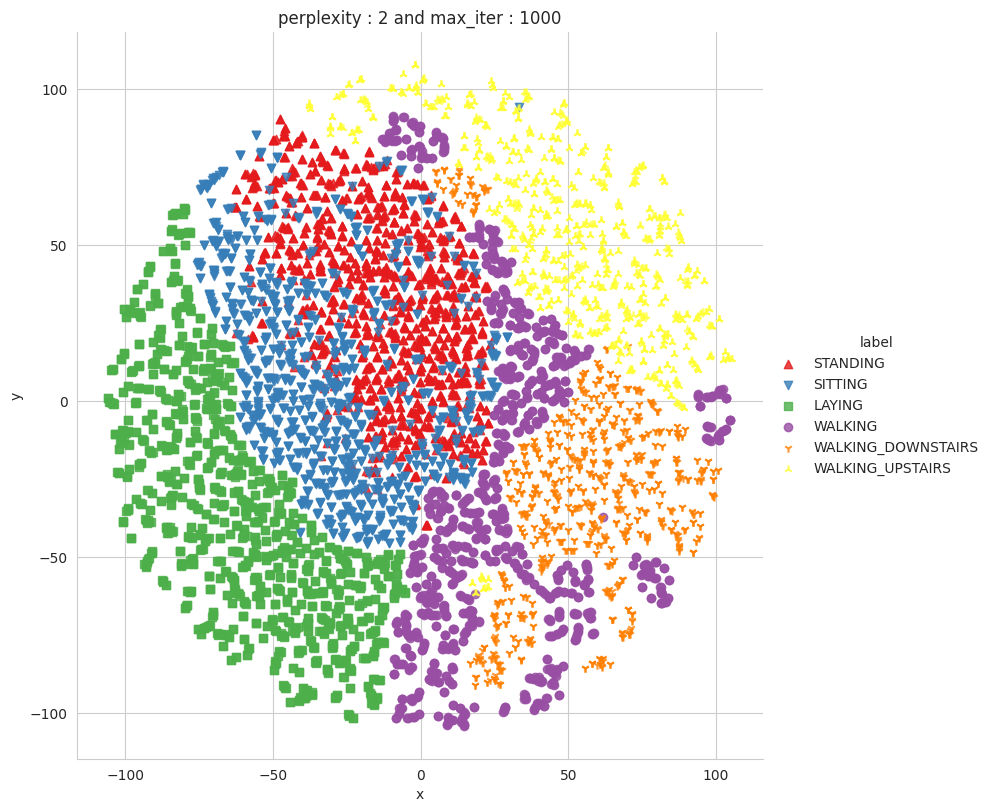

Done

performing tsne with perplexity 5 and with 1000 iterations at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.015s...
[t-SNE] Computed neighbors for 7352 samples in 2.087s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.961446
[t-SNE] Computed conditional probabilities in 0.056s
[t-SNE] Iteration 50: error = 107.1389084, gradient norm = 0.0417177 (50 iterations in 6.874s)
[t-SNE] Iteration 100: error = 95.7003021, gradient norm = 0.0149073 (50 iteration

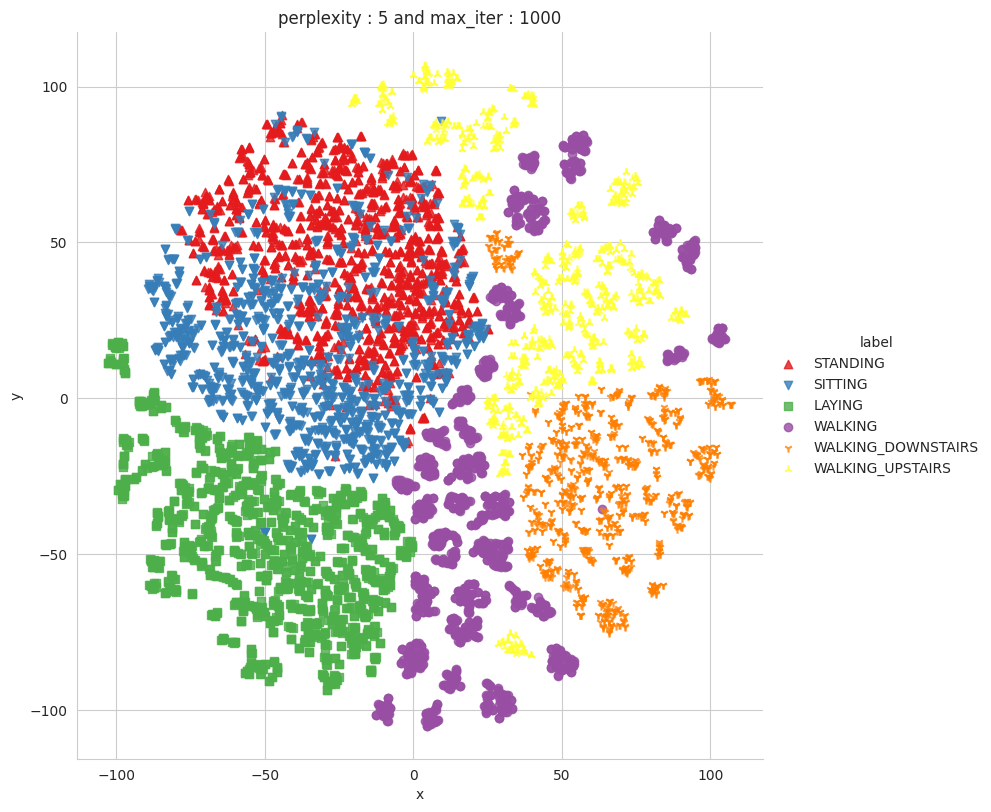

Done

performing tsne with perplexity 10 and with 1000 iterations at max
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.014s...
[t-SNE] Computed neighbors for 7352 samples in 1.699s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.133827
[t-SNE] Computed conditional probabilities in 0.060s
[t-SNE] Iteration 50: error = 97.8867722, gradient norm = 0.0339574 (50 iterations in 7.814s)
[t-SNE] Iteration 100: error = 88.9239349, gradient norm = 0.0112002 (50 iteration

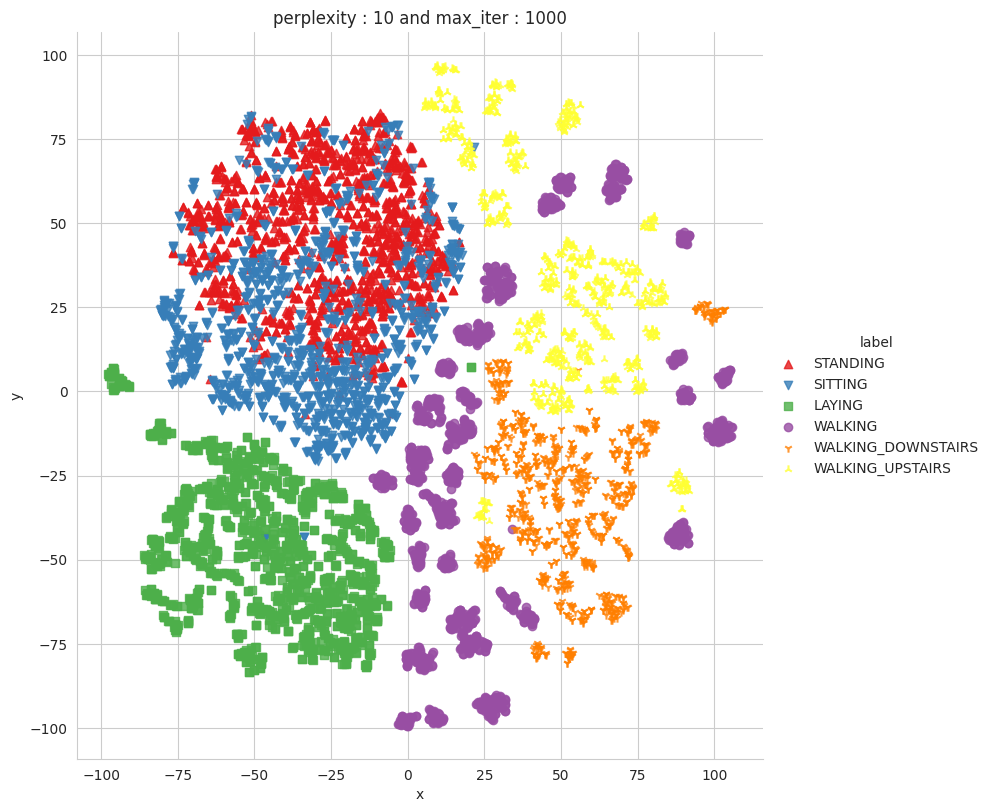

Done

performing tsne with perplexity 20 and with 1000 iterations at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.015s...
[t-SNE] Computed neighbors for 7352 samples in 1.829s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.274336
[t-SNE] Computed conditional probabilities in 0.112s
[t-SNE] Iteration 50: error = 89.2858658, gradient norm = 0.0295782 (50 iterations in 7.652s)
[t-SNE] Iteration 100: error = 82.9640045, gradient norm = 0.0076355 (50 iteration

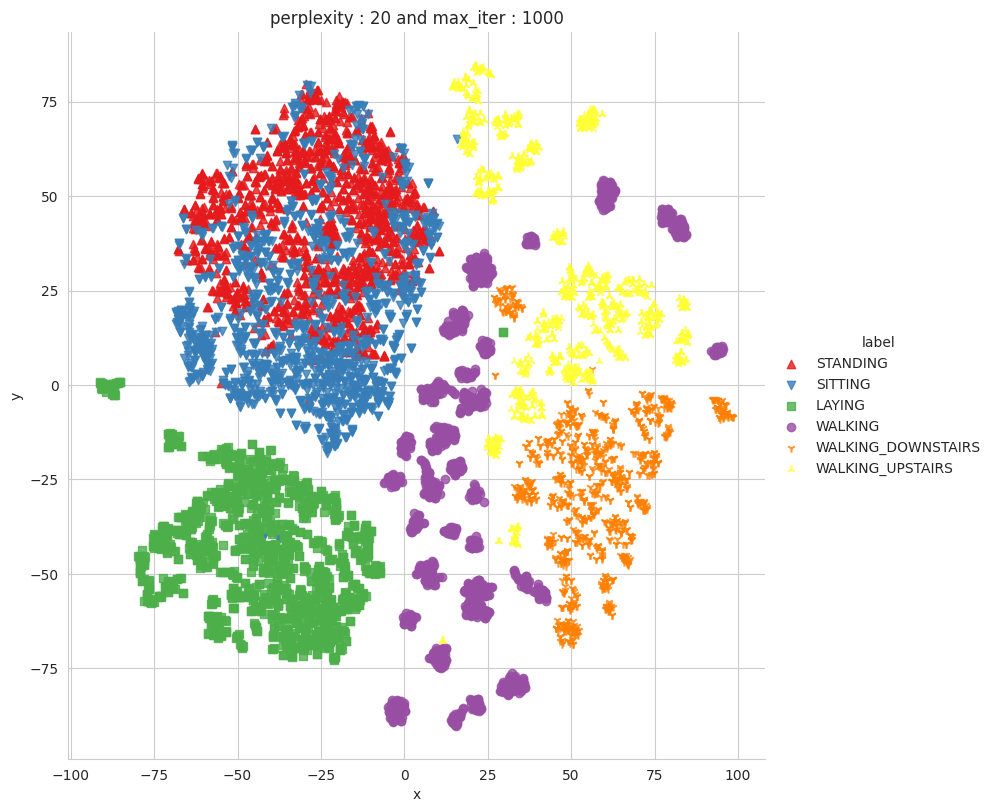

Done

performing tsne with perplexity 50 and with 1000 iterations at max
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.022s...
[t-SNE] Computed neighbors for 7352 samples in 3.144s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.437672
[t-SNE] Computed conditional probabilities in 0.458s
[t-SNE] Iteration 50: error = 78.8200531, gradient norm = 0.0245309 (50 iterations in 9.144s)
[t-SNE] Iteration 100: error = 75.2277069, gradient norm = 0.0052746 (50 iteratio

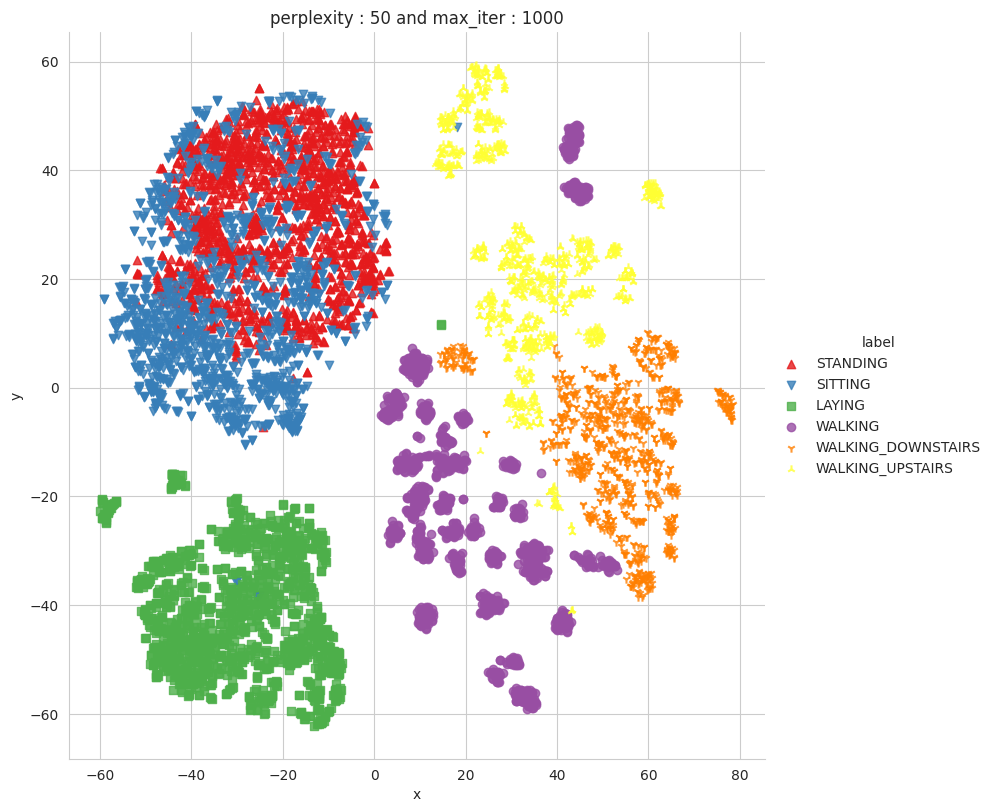

Done


In [27]:
X_pre_tsne = train.drop(['subject', 'Activity','ActivityName'], axis=1)
y_pre_tsne = train['ActivityName']
perform_tsne(X_data = X_pre_tsne,y_data=y_pre_tsne, perplexities =[2,5,10,20,50])

In [28]:
#applying machine learning algorithm

import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from datetime import datetime

from sklearn import linear_model
from sklearn import metrics

from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [29]:
train = pd.read_csv('/content/drive/MyDrive/UCI HAR Dataset/train.csv')
test = pd.read_csv('/content/drive/MyDrive/UCI HAR Dataset/test.csv')
print(train.shape, test.shape)

(7352, 564) (2947, 564)


In [30]:
train.head(2)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING


In [31]:

X_train = train.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_train = train.ActivityName

X_test = test.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_test = test.ActivityName

print('X_train and y_train : ({},{})'.format(X_train.shape, y_train.shape))
print('X_test  and y_test  : ({},{})'.format(X_test.shape, y_test.shape))

X_train and y_train : ((7352, 561),(7352,))
X_test  and y_test  : ((2947, 561),(2947,))


In [32]:
#model creation


labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']



In [33]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [34]:
from datetime import datetime
def perform_model(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True, \
                 print_cm=True, cm_cmap=plt.cm.Greens):


    # to store results at various phases
    results = dict()

    # time at which model starts training
    train_start_time = datetime.now()
    print('training the model..')
    model.fit(X_train, y_train)
    print('Done....!\n')
    train_end_time = datetime.now()
    results['training_time'] =  train_end_time - train_start_time
    print('==> training time:- {}\n'.format(results['training_time']))


    # predict test data
    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    print('Done....!\n')
    results['testing_time'] = test_end_time - test_start_time
    print('==> testing time:- {}\n'.format(results['testing_time']))
    results['predicted'] = y_pred


    # calculate overall accuracty of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('==> Accuracy:- {}\n'.format(accuracy))



    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm:
        print('\n ********Confusion Matrix********')
        print('\n {}'.format(cm))

    # plot confusin matrix
    plt.figure(figsize=(6,6))
    plt.grid(visible=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix', cmap = cm_cmap)
    plt.show()

    # get classification report
    print('****************| Classifiction Report |****************')
    classification_report = metrics.classification_report(y_test, y_pred)

    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)

    # add the trained  model to the results
    results['model'] = model

    return results


In [35]:
def print_grid_search_attributes(model):
    # Estimator that gave highest score among all the estimators formed in GridSearch
    print('\n\n==> Best Estimator:')
    print('\t{}\n'.format(model.best_estimator_))


    # parameters that gave best results while performing grid search
    print('\n==> Best parameters:')
    print('\tParameters of best estimator : {}'.format(model.best_params_))


    #  number of cross validation splits
    print('\n==> No. of CrossValidation sets:')
    print('\tTotal numbre of cross validation sets: {}'.format(model.n_splits_))


    # Average cross validated score of the best estimator, from the Grid Search
    print('\n==> Best Score:')
    print('\tAverage Cross Validate scores of best estimator : {}'.format(model.best_score_))

training the model..
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Done....!

==> training time:- 0:00:24.893052

Predicting test data
Done....!

==> testing time:- 0:00:00.015159

==> Accuracy:- 0.9586019681031558


 ********Confusion Matrix********

 [[537   0   0   0   0   0]
 [  0 431  57   0   0   3]
 [  0  16 516   0   0   0]
 [  0   0   0 493   2   1]
 [  0   0   0   4 405  11]
 [  0   0   0  27   1 443]]


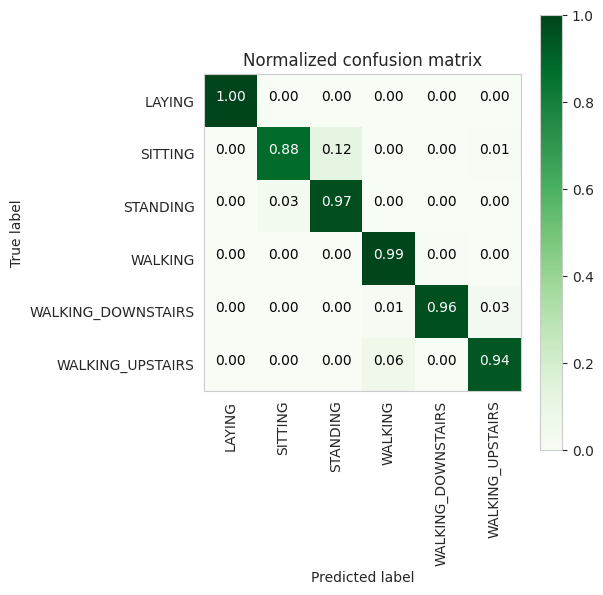

****************| Classifiction Report |****************
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.96      0.88      0.92       491
          STANDING       0.90      0.97      0.93       532
           WALKING       0.94      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.96      0.98       420
  WALKING_UPSTAIRS       0.97      0.94      0.95       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



==> Best Estimator:
	LogisticRegression(C=1)


==> Best parameters:
	Parameters of best estimator : {'C': 1, 'penalty': 'l2'}

==> No. of CrossValidation sets:
	Total numbre of cross validation sets: 3

==> Best Score:
	Average Cross Validate scores of best estimator : 0.9377055595800132


In [36]:
#logistic regression
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=ConvergenceWarning)

#Grid search
parameters = {'C':[0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2','l1']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)

# observe the attributes of the model
print_grid_search_attributes(log_reg_grid_results['model'])

training the model..
Done....!

==> training time:- 0:00:41.375009

Predicting test data
Done....!

==> testing time:- 0:00:00.009529

==> Accuracy:- 0.838479809976247


 ********Confusion Matrix********

 [[537   0   0   0   0   0]
 [  0 400  91   0   0   0]
 [  0 113 419   0   0   0]
 [  0   0   0 470  10  16]
 [  0   0   0  49 266 105]
 [  0   0   0  86   6 379]]


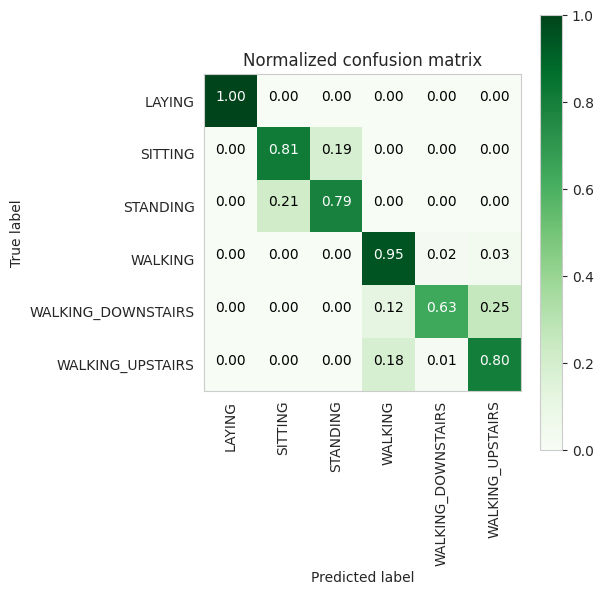

****************| Classifiction Report |****************
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.78      0.81      0.80       491
          STANDING       0.82      0.79      0.80       532
           WALKING       0.78      0.95      0.85       496
WALKING_DOWNSTAIRS       0.94      0.63      0.76       420
  WALKING_UPSTAIRS       0.76      0.80      0.78       471

          accuracy                           0.84      2947
         macro avg       0.85      0.83      0.83      2947
      weighted avg       0.85      0.84      0.84      2947



==> Best Estimator:
	DecisionTreeClassifier(max_depth=5)


==> Best parameters:
	Parameters of best estimator : {'max_depth': 5}

==> No. of CrossValidation sets:
	Total numbre of cross validation sets: 5

==> Best Score:
	Average Cross Validate scores of best estimator : 0.8513370052303723


In [37]:
#Decision tree
parameters = {'max_depth':np.arange(3,10,2)}
dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt,param_grid=parameters, n_jobs=-1)
dt_grid_results = perform_model(dt_grid, X_train, y_train, X_test, y_test, class_labels=labels)

# observe the attributes of the model
print_grid_search_attributes(dt_grid_results['model'])

training the model..
Done....!

==> training time:- 0:34:57.058948

Predicting test data
Done....!

==> testing time:- 0:00:00.054434

==> Accuracy:- 0.9182219205972175


 ********Confusion Matrix********

 [[537   0   0   0   0   0]
 [  0 432  59   0   0   0]
 [  0  50 482   0   0   0]
 [  0   0   0 484   9   3]
 [  0   0   0  25 347  48]
 [  0   0   0  40   7 424]]


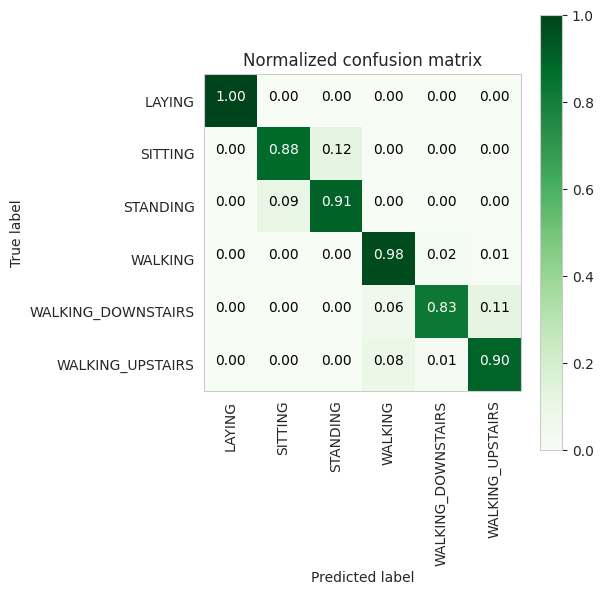

****************| Classifiction Report |****************
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.90      0.88      0.89       491
          STANDING       0.89      0.91      0.90       532
           WALKING       0.88      0.98      0.93       496
WALKING_DOWNSTAIRS       0.96      0.83      0.89       420
  WALKING_UPSTAIRS       0.89      0.90      0.90       471

          accuracy                           0.92      2947
         macro avg       0.92      0.91      0.92      2947
      weighted avg       0.92      0.92      0.92      2947



==> Best Estimator:
	RandomForestClassifier(max_depth=9, n_estimators=130)


==> Best parameters:
	Parameters of best estimator : {'max_depth': 9, 'n_estimators': 130}

==> No. of CrossValidation sets:
	Total numbre of cross validation sets: 5

==> Best Score:
	Average Cross Validate scores of best estimator : 0.9234269805814916


In [38]:

params = {'n_estimators': np.arange(10,201,20), 'max_depth':np.arange(3,15,2)}
rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc, param_grid=params, n_jobs=-1)
rfc_grid_results = perform_model(rfc_grid, X_train, y_train, X_test, y_test, class_labels=labels)

# observe the attributes of the model
print_grid_search_attributes(rfc_grid_results['model'])

In [39]:
print('\n                     Accuracy     Error')
print('                     ----------   --------')
print('Logistic Regression : {:.04}%       {:.04}%'.format(log_reg_grid_results['accuracy'] * 100,\
                                                  100-(log_reg_grid_results['accuracy'] * 100)))


print('DecisionTree        : {:.04}%      {:.04}% '.format(dt_grid_results['accuracy'] * 100,\
                                                        100-(dt_grid_results['accuracy'] * 100)))

print('Random Forest       : {:.04}%      {:.04}% '.format(rfc_grid_results['accuracy'] * 100,\
                                                           100-(rfc_grid_results['accuracy'] * 100)))



                     Accuracy     Error
                     ----------   --------
Logistic Regression : 95.86%       4.14%
DecisionTree        : 83.85%      16.15% 
Random Forest       : 91.82%      8.178% 


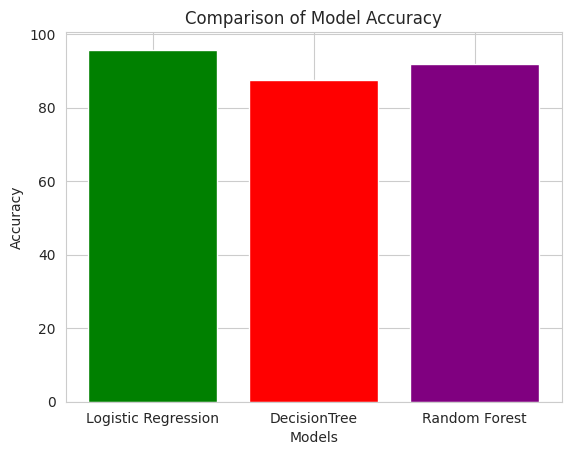

In [40]:
x= ["Logistic Regression","DecisionTree","Random Forest"]
y= [95.79,87.68,91.96]
plt.bar(x,y, color=['green', 'red','purple'])
plt.xlabel("Models")
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracy')
plt.show()

In [41]:
# Importing Libraries

import pandas as pd
import numpy as np

# Import Keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import LSTM
# Import Dense and Dropout directly from keras.layers
from keras.layers import Dense, Dropout
from keras.layers import BatchNormalization
from keras.regularizers import L1L2

In [42]:
# Activities are the class labels
# It is a 6 class classification
ACTIVITIES = {
    0: 'WALKING',
    1: 'WALKING_UPSTAIRS',
    2: 'WALKING_DOWNSTAIRS',
    3: 'SITTING',
    4: 'STANDING',
    5: 'LAYING',
}

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# function to print the confusion matrix

def confusion_matrix(Y_true, Y_pred):

    Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_true, axis=1)])
    Y_pred = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_pred, axis=1)])

    return pd.crosstab(Y_true, Y_pred, rownames=['True'], colnames=['Pred'])


    result = confusion_matrix(Y_true, Y_pred)

    plt.figure(figsize=(10, 8))
    sns.heatmap(result,
                xticklabels= list(ACTIVITIES.values()),
                yticklabels=list(ACTIVITIES.values()),
                annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


# Data directory
DATADIR = 'UCI_HAR_Dataset'

# Raw data signals
# Signals are from Accelerometer and Gyroscope
# The signals are in x,y,z directions
# Sensor signals are filtered to have only body acceleration
# excluding the acceleration due to gravity
# Triaxial acceleration from the accelerometer is total acceleration
SIGNALS = [
    "body_acc_x",
    "body_acc_y",
    "body_acc_z",
    "body_gyro_x",
    "body_gyro_y",
    "body_gyro_z",
    "total_acc_x",
    "total_acc_y",
    "total_acc_z"
    ]


# define a function to read the data from csv file
def _read_csv(filename):
    return pd.read_csv(filename, delim_whitespace=True, header=None)

# function to load the load
def load_signals(subset):
    signals_data = []

    for signal in SIGNALS:
        filename = f'/content/drive/MyDrive/UCI HAR Dataset/{subset}/Inertial Signals/{signal}_{subset}.txt'
        signals_data.append(
            _read_csv(filename).to_numpy()
        )

    # Transpose is used to change the dimensionality of the output,
    # aggregating the signals by combination of sample/timestep.
    # Resultant shape is (7352 train/2947 test samples, 128 timesteps, 9 signals)
    return np.transpose(signals_data, (1, 2, 0))


def load_y(subset):
    """
    The objective that we are trying to predict is a integer, from 1 to 6,
    that represents a human activity. We return a binary representation of
    every sample objective as a 6 bits vector using One Hot Encoding
    (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)
    """
    filename = f'/content/drive/MyDrive/UCI HAR Dataset/{subset}/y_{subset}.txt'
    y = _read_csv(filename)[0]

    return pd.get_dummies(y).to_numpy()


def load_data():
    """
    Obtain the dataset from multiple files.
    Returns: X_train, X_test, y_train, y_test
    """
    X_train, X_test = load_signals('train'), load_signals('test')
    y_train, y_test = load_y('train'), load_y('test')

    return X_train, X_test, y_train, y_test


# Importing tensorflow
np.random.seed(42)
import tensorflow as tf
tf.random.set_seed(42)


# Initializing parameters
epochs = 30
batch_size = 16
n_hidden = 32


#function to count the number of classes
def _count_classes(y):
    return len(set([tuple(category) for category in y]))


# Loading the train and test data
X_train, X_test, y_train, y_test = load_data()


timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
n_classes = _count_classes(y_train)

print(timesteps)
print(input_dim)
print(len(X_train))

128
9
7352

# Initiliazing the sequential model
model = Sequential()
# Configuring the parameters
model.add(LSTM(n_hidden, input_shape=(timesteps, input_dim)))
# Adding a dropout layer
model.add(Dropout(0.5))
# Adding a dense output layer with sigmoid activation
model.add(Dense(n_classes, activation='sigmoid'))
model.summary()

128
9
7352


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 32)                  │           5,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 6)                   │             198 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,574 (21.77 KB)

 Trainable params: 5,574 (21.77 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [45]:
# Training the model
model.fit(X_train, y_train, batch_size=batch_size, validation_data=(X_test, y_test),epochs=epochs)

Epoch 1/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.4141 - loss: 1.3768 - val_accuracy: 0.5850 - val_loss: 0.9232
Epoch 2/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.6863 - loss: 0.7621 - val_accuracy: 0.7581 - val_loss: 0.6443
Epoch 3/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8041 - loss: 0.5485 - val_accuracy: 0.7923 - val_loss: 0.5764
Epoch 4/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8645 - loss: 0.4169 - val_accuracy: 0.8582 - val_loss: 0.4331
Epoch 5/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8902 - loss: 0.3456 - val_accuracy: 0.8649 - val_loss: 0.4609
Epoch 6/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9089 - loss: 0.2838 - val_accuracy: 0.8561 - val_loss: 0.4860
Epoch 7/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9111 - loss: 0.2763 - val_accuracy: 0.8717 - val_loss: 0.4079
Epoch 8/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9244 - loss: 0.2322 - val_accuracy:

In [46]:
# Confusion Matrix
confusion_matrix(y_test, model.predict(X_test))

93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


Pred,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
True,,,,,,
LAYING,537,0,0,0,0,0
SITTING,2,408,78,2,0,1
STANDING,0,108,422,2,0,0
WALKING,0,0,0,468,0,28
WALKING_DOWNSTAIRS,0,0,0,3,393,24
WALKING_UPSTAIRS,0,0,0,7,1,463


In [47]:
score = model.evaluate(X_test, y_test)

print("\n   categorical_crossentropy  ||   accuracy ")
print("  ____________________________________")
print(score)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8649 - loss: 0.4150

   categorical_crossentropy  ||   accuracy 
  ____________________________________
[0.37024956941604614, 0.9131320118904114]


In [48]:

# Initializing parameters
n_epochs = 30
n_batch = 16
n_classes = _count_classes(y_train)

# Bias regularizer value - we will use elasticnet
reg = L1L2(0.01, 0.01)

In [49]:
# Model execution
model = Sequential()
model.add(LSTM(48, input_shape=(timesteps, input_dim), return_sequences=True,bias_regularizer=reg ))
model.add(BatchNormalization())
model.add(Dropout(0.50))
model.add(LSTM(32))
model.add(Dropout(0.50))
model.add(Dense(n_classes, activation='sigmoid'))
print("Model Summary: ")
model.summary()

Model Summary: 


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 128, 48)             │          11,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128, 48)             │             192 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128, 48)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 32)                  │          10,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             198 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,894 (85.52 KB)

 Trainable params: 21,798 (85.15 KB)

 Non-trainable params: 96 (384.00 B)

In [50]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [51]:
# Training the model
model.fit(X_train, y_train, batch_size=n_batch, validation_data=(X_test, y_test), epochs=n_epochs)

Epoch 1/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.5687 - loss: 1.9398 - val_accuracy: 0.7876 - val_loss: 1.0478
Epoch 2/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.8361 - loss: 0.8880 - val_accuracy: 0.8935 - val_loss: 0.5501
Epoch 3/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.8940 - loss: 0.5264 - val_accuracy: 0.9016 - val_loss: 0.4115
Epoch 4/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9249 - loss: 0.3265 - val_accuracy: 0.9138 - val_loss: 0.2626
Epoch 5/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9286 - loss: 0.2461 - val_accuracy: 0.8921 - val_loss: 0.3176
Epoch 6/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9278 - loss: 0.2218 - val_accuracy: 0.9148 - val_loss: 0.2535
Epoch 7/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9312 - loss: 0.1926 - val_accuracy: 0.9233 - val_loss: 0.1952
Epoch 8/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9272 - loss: 0.2246 - val

In [52]:
# Confusion Matrix
confusion_matrix(y_test, model.predict(X_test))

93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


Pred,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
True,,,,,,
LAYING,537,0,0,0,0,0
SITTING,2,380,105,0,0,4
STANDING,0,78,454,0,0,0
WALKING,0,0,1,462,33,0
WALKING_DOWNSTAIRS,0,0,0,0,420,0
WALKING_UPSTAIRS,0,0,0,2,23,446


In [53]:
score = model.evaluate(X_test, y_test)

print("\n   categorica_crossentropy  ||   accuracy ")
print("  ____________________________________")
print(score)


93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8811 - loss: 0.3950

   categorica_crossentropy  ||   accuracy 
  ____________________________________
[0.3222901523113251, 0.9158466458320618]


In [54]:

# Model execution
model = Sequential()
model.add(LSTM(64, input_shape=(timesteps, input_dim), return_sequences=True, bias_regularizer=reg))
model.add(BatchNormalization())
model.add(Dropout(0.50))
model.add(LSTM(48))
model.add(Dropout(0.50))
model.add(Dense(n_classes, activation='sigmoid'))
print("Model Summary: ")
model.summary()

Model Summary: 


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 128, 64)             │          18,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128, 64)             │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 48)                  │          21,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 48)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │             294 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41,190 (160.90 KB)

 Trainable params: 41,062 (160.40 KB)

 Non-trainable params: 128 (512.00 B)

In [55]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [56]:
# Training the model
model.fit(X_train, y_train, batch_size=n_batch, validation_data=(X_test, y_test), epochs=n_epochs)

Epoch 1/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.6059 - loss: 2.1132 - val_accuracy: 0.7764 - val_loss: 1.2709
Epoch 2/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.8664 - loss: 0.8867 - val_accuracy: 0.8901 - val_loss: 0.5121
Epoch 3/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9114 - loss: 0.4132 - val_accuracy: 0.8758 - val_loss: 0.4186
Epoch 4/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.9227 - loss: 0.2478 - val_accuracy: 0.8979 - val_loss: 0.3099
Epoch 5/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9330 - loss: 0.1947 - val_accuracy: 0.9121 - val_loss: 0.2268
Epoch 6/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.9360 - loss: 0.1754 - val_accuracy: 0.9118 - val_loss: 0.2313
Epoch 7/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9412 - loss: 0.1613 - val_accuracy: 0.9145 - val_loss: 0.2388
Epoch 8/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.9389 - loss: 0.1696 - val_

In [57]:
# Confusion Matrix
confusion_matrix(y_test, model.predict(X_test))

93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


Pred,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
True,,,,,,
LAYING,537,0,0,0,0,0
SITTING,22,402,63,0,1,3
STANDING,0,103,428,0,1,0
WALKING,0,0,0,466,26,4
WALKING_DOWNSTAIRS,0,0,0,0,415,5
WALKING_UPSTAIRS,0,0,0,0,27,444


In [58]:
score = model.evaluate(X_test, y_test)

print("\n   categorical_crossentropy  ||   accuracy ")
print("  ____________________________________")
print(score)

93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8674 - loss: 0.4003

   categorical_crossentropy  ||   accuracy 
  ____________________________________
[0.33840712904930115, 0.9134713411331177]


In [59]:
from prettytable import PrettyTable

In [60]:
ptable1 = PrettyTable()
ptable1.title = " Model Comparision "
ptable1.field_names = ['Model Name','Hyperparameter Tunning', 'Accuracy']

print("\n\n ********** Machine Learning Model Comparision ************")
ptable1.add_row(["Logistic Regression","Done","95.83%"])
ptable1.add_row(["Linear SVC  ","Done","96.74%"])
ptable1.add_row(["rbf SVM classifier","Done","96.27%"])
ptable1.add_row(["DecisionTree","Done","87.78%"])
ptable1.add_row(["Random Forest","Done","92.67%"])

print(ptable1)
# *****************************************************************

ptable2 = PrettyTable()
ptable2.title = " Model Comparision "
ptable2.field_names = ['Model Name','Hyperparameter Tunning', 'categorical_crossentropy', 'Accuracy']

print("\n\n ********************************* Deep Learning LSTM Model Comparision ***********************************")
ptable2.add_row(["LSTM With 1_Layer(neurons:32)","Done","0.47", "0.91"])
ptable2.add_row(["LSTM With 2_Layer(neurons:48, neurons:32)","Done","0.39", "0.91"])
ptable2.add_row(["LSTM With 2_Layer(neurons:64, neurons:48)","Done","0.27", "0.91"])

print(ptable2)



 ********** Machine Learning Model Comparision ************
+---------------------------------------------------------+
|                    Model Comparision                    |
+---------------------+------------------------+----------+
|      Model Name     | Hyperparameter Tunning | Accuracy |
+---------------------+------------------------+----------+
| Logistic Regression |          Done          |  95.83%  |
|     Linear SVC      |          Done          |  96.74%  |
|  rbf SVM classifier |          Done          |  96.27%  |
|     DecisionTree    |          Done          |  87.78%  |
|    Random Forest    |          Done          |  92.67%  |
+---------------------+------------------------+----------+


 ********************************* Deep Learning LSTM Model Comparision ***********************************
+----------------------------------------------------------------------------------------------------------+
|                                            Model Comparis